Implement the function stubs in altproj_code.py and complete lines with "###"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import rand, randn
from scipy.linalg import inv, svd
from scipy.optimize import linprog
from tqdm import tqdm_notebook as tqdm

from altproj_code import null_space, altproj, lp_altproj, kaczmarz

### Exercise 1

Let $U$ and $W$ be subspaces of $\mathbb{R}^5$ that are spanned, respectively, by the columns of the matrices $A$ and $B$ (shown below). 
Write a function `altproj(A,B,v0,n)` that returns $\underline{v}_{2n}$ after $2n$ steps of alternating projection onto $U$ and $W$ starting from $\underline{v}_0$. 
Use this function to find the orthogonal projection of $\underline{v}_0$ (shown below) onto $ U \cap W $. How large should $n$ be chosen so that the projection is correct to 4 decimal places (e.g., absolute error at most 0.0001 in each coordinate)?
$$
A = 
\begin{bmatrix}
 3 & 2 & 3 \\ 1 & 5 & 7 \\ 4 & 11 & 13 \\ 1 & 17 & 19 \\ 5 & 23 & 29
\end{bmatrix}, \qquad
B = 
\begin{bmatrix}
 1 & 1 & 2.5 \\ 2 & 0 & 6 \\ 2 & 1 & 12 \\ 2 & 0 & 18 \\ 6 & -3 & 26
\end{bmatrix}, \qquad
\underline{v}_0 =
\begin{bmatrix}
 1 \\2 \\ 3 \\ 4 \\ 5
\end{bmatrix}
$$
To find the intersection of $U$ and $W$, we note that the following Python snippet returns a matrix whose columns span $ U \cap W $
```
basis_UintW = np.hstack([A, B]) @ null_space(np.hstack([A, -B])) 
```

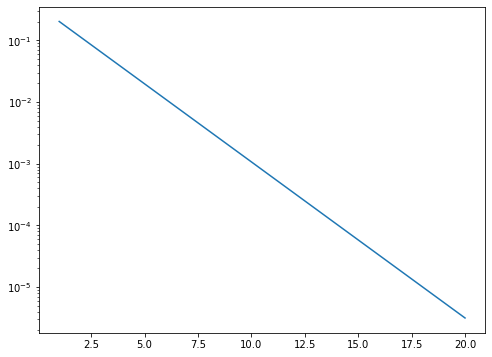

In [2]:
A = np.array([[3, 1, 4, 1, 5], [2, 5, 11, 17, 23], [3, 7, 13, 19, 29]]).T
B = np.array([[1, 2, 2, 2, 6], [1, 0, 1, 0, -3], [2.5, 6, 12, 18, 26]]).T
v0 = np.array([1, 2, 3, 4, 5])
n = 20
v, err = altproj(A, B, v0, n)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, n + 1), err)

### Exercise 2

Write a function `kaczmarz(A,b,I)` that returns a matrix $X$ with $I$ columns corresponding
to the Kaczmarz iteration after $i = 1, 2, ..., I$ full passes through the Kaczmarz algorithm
for the matrix $A$ and right-hand side $\underline{b}$ (e.g., one full pass equals $m$ steps). 
Use this function to find the minimum-norm solution of linear system $A \underline{x} = \underline{b}$ for
$$
A = 
\begin{bmatrix}
 2 & 5 & 11 & 17 & 23 \\ 3 & 7 & 13 & 19 & 29
\end{bmatrix}, \qquad
\underline{b} =
\begin{bmatrix}
 228 \\ 227
\end{bmatrix}
$$
Plot the error (on a log scale) versus the number of full passes for $I = 500$.

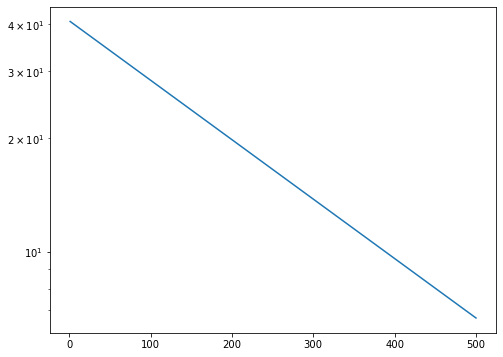

In [3]:
A = np.array([[2, 5, 11, 17, 23], [3, 7, 13, 19, 29]])
b = np.array([228, 227])
I = 500
X, err = kaczmarz(A, b, I)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

### Exercise 3

Repeat the experiment with $I = 100$ for a random system defined by `A = randn(500,1000)`
and `b = A @ randn(1000)`. 
Compare the iterative solution with the true minimum-norm solution 
$ \hat{\underline{x}} = A^H {(A A^H)}^{-1} \underline{b} $.

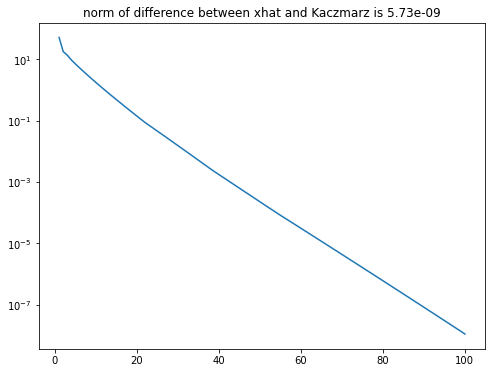

In [4]:
A = randn(500, 1000)
b = A @ randn(1000)
I = 100
X, err = kaczmarz(A, b, I)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

x_hat = A.T@np.linalg.inv(A@A.T)@b
x_hat_err = err

plt.title(f'norm of difference between xhat and Kaczmarz is {np.linalg.norm(x_hat - X[:, -1]):.2e}');

### Exercise 4

Consider the linear program
$$
\min ~ \underline{c}^T \underline{x}
\quad \textrm{subject to} \quad
A \underline{x} \ge \underline{b}, \quad \underline{x} \ge 0
$$
with
$$
\underline{c} = 
\begin{bmatrix}
    3 \\ -1 \\ 2
\end{bmatrix}, \quad
A = 
\begin{bmatrix}
    2 & -1 & 1 \\ 1 & 0 & 2 \\ -7 & 4 & -6
\end{bmatrix}, \quad
\underline{b} = 
\begin{bmatrix}
    -1 \\ 2 \\ 1
\end{bmatrix}, \quad
$$
Let $p^*$ denote the optimum value of this program.
Then, $p^* \le 0$ is satisfied if and only if there is a non-negative $\underline{x} = (x_1, x_2, x_3)^T$ satisfying
$$
\begin{align}
2x_1 - x_2 + x_3 &\ge -1 \\
x_1 + 2x_3 &\ge 2 \\
-7x_1 + 4x_2 - 6x_3 &\ge 1 \\
-3x_1 + x_2 - 2x_3 &\ge 0
\end{align}
$$
where the last inequality restricts the value of the program to be at most $0$.
One can find the optimum value `p` and an optimizer `x` with the command 
```
res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * c.size, method=’interior-point’)
x, p = res.x, res.fun
```

Starting from $\underline{x}_0 = 0$, write a program that uses alternating projections onto half spaces (see (6)) to find a non-negative vector satisfying the above inequalities. 

Warning: don’t forget to also project onto the half spaces defined by the non-negativity constraints $ x_1 \ge 0, x_2 \ge 0, x_3 \ge 0 $. 

Use the result to find a vector that satisfies all the inequalities. 
How many iterations are required so that the
absolute error is at most 0.0001 in each coordinate?

     con: array([], dtype=float64)
     fun: 1.828759366162558e-12
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([8.35331804e-13, 4.82280882e-13, 1.00000000e+00])
  status: 0
 success: True
       x: array([1.50428212e-12, 2.00000000e+00, 1.00000000e+00])
True True


array([-0.  ,  1.75,  1.  ])

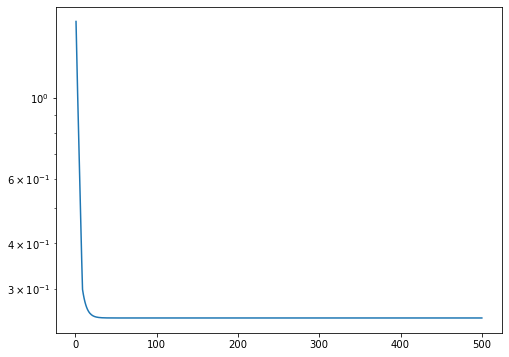

In [5]:
c = np.array([3, -1, 2])
A = np.array([[2, -1, 1], [1, 0, 2], [-7, 4, -6]])
b = np.array([-1, 2, 1])

res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * c.size, method='interior-point')
print(res)

I = 500
# Do not forget constraint xi >= 0

A1 = A
b1 = b
x, err = lp_altproj(A1, b1, I)



plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)

x = np.round(x,10)
print(np.all(A @ x - b >= 0), np.all(x >= 0))
x

### Exercise 5

Consider the “random” convex optimization problem defined by
```
c = randn(1000)
A = np.vstack([-np.ones((1, 1000)), randn(500, 1000)])
b = np.concatenate([[-1000], A[1:] @ rand(1000)])
```
Modify $A$ and $b$ (by adding one row and one element) so that your function can be used to prove that the value of the convex optimization problem, in (3), is at most −1000. Try using `I = 1000` passes
through all 501 inequality constraints.
This type of iteration typically terminates with an “almost feasible” $\underline{x}$. 
To find a strictly feasible point, try running the same algorithm with the argument $ \underline{b} + \epsilon $ for some small $ \epsilon > 0 $  (e.g., try $ \epsilon = {10}^{-6} $).
Then, the resulting $ \underline{x} $ can satisfy `np.all(A @ x - b > 0)`

True False [-3.96709696]
-1198.5327823524153


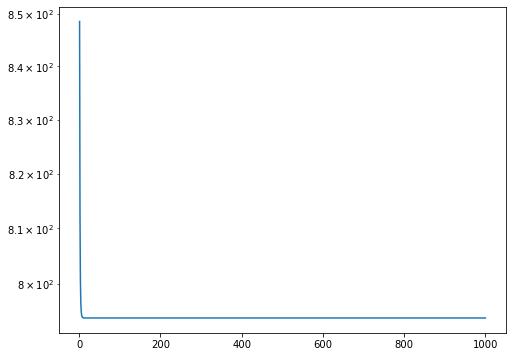

In [13]:
np.random.seed(0)
c = randn(1000)
A = np.vstack([-np.ones((1, 1000)), randn(500, 1000)])
b = np.concatenate([[-1000], A[1:] @ rand(1000)])

I, ep = 1000, 1e-6
# Do not forget constraint xi >= 0, and c^T x <= -1000
### A1 = 
### b1 = 
A1 = A
b1 = b

x, err = lp_altproj(A1, b1 + ep, I)
print(np.all(A @ x - b > 0), np.all(x > 0), c.reshape(1, -1) @ x)

plt.figure(figsize=(8, 6))
plt.semilogy(np.arange(1, I + 1), err)
s =1
res = linprog(c, A_ub=-A, b_ub=-b, bounds=[(0, None)] * 1000, method='interior-point')
print(res.fun)

In [12]:
import numpy as np
import pandas as pd
from altproj_code import altproj, kaczmarz, lp_altproj

#
# Desired output of this script
# -----------------------------
#
# altproj Example 1 err:
#  [1.0752     0.99090432 0.91321742 0.84162118 0.77563808]
# altproj Example 1:v
#  [0.58172856 0.77563808] 
#
# altproj Example 2 err:
#  3.3587408979332825
# altproj Example 2 v:
#  [5.80196883 5.7414081  5.80196883 4.7037591  5.80196883] 
#
# altproj Example 3 err:
#  0.020871922644255747
# altproj Example 3 v:
#  [2.70685396 5.37727694 2.70685396 8.04162808 2.70685396] 
#
# kaczmarz Example 4 err:
#  0.028524403942799426
# kaczmarz Example 4 X:
#  [-0.13512375  0.0941078  -0.13512375  0.39621042 -0.13512375] 
#
# kaczmarz Example 5 err:
#  0.01468037281401613
# kaczmarz Example 5 X:
#  [-0.03184633 -0.03805198  0.04546457  0.02235128  0.04669109  0.108116  ] 
#
#

### If you project on x >= 0 constraints only after each full pass
# lp_altproj Example 6 err:
#  0.05188146770730828
# lp_altproj Example 6 v:
#  [-1.96541235 -1.98270618] 
#
# lp_altproj Example 7 err:
#  0.7250551085496868
# lp_altproj Example 7 v:
#  [2.01660003 1.81980856 1.62730644] 

### If you project on x >= 0 constraints after each row of A
# lp_altproj Example 6 err:
#  3.333333318673178
# lp_altproj Example 6 v:
#  [0.66666666 0.        ] 
#
# lp_altproj Example 7 err:
#  0.6566929819164207
# lp_altproj Example 7 v:
#  [2.02850424 1.83679799 1.64897667] 


# Test altproj
A = np.array([[4, 3]]).T
B = np.array([[3, 4]]).T
v0 = np.array([1, 1])
n = 5
v, err = altproj(A, B, v0, n)
print("altproj Example 1 err:\n",err)
print("altproj Example 1:v\n",v,"\n")

A = np.array([[1, 2, 1, 3, 1],[6, 7, 6, 7, 6]]).T
B = np.array([[1, 2, 1, 3, 1],[7, 8, 7, 8, 7]]).T
v0 = np.array([10, 2, 10, 3, 10])
n = 5000
v, err = altproj(A, B, v0, n)
print("altproj Example 2 err:\n",err[-1])
print("altproj Example 2 v:\n",v,"\n")
n = 40000
v, err = altproj(A, B, v0, n)
print("altproj Example 3 err:\n",err[-1])
print("altproj Example 3 v:\n",v,"\n")

# Test kaczmarz
A = np.array([[1, 2, 1, 3, 1],[6, 7, 6, 7, 6]])
b = np.array([1, 1])
X, err = kaczmarz(A, b, 20)
print("kaczmarz Example 4 err:\n",err[-1])
print("kaczmarz Example 4 X:\n",X[:,-1],"\n")

A = np.array([[4, 2, 7, 3, 1, 7],[6, 7, 6, 7, 6, 7],[1, 2, 3, 4, 5, 6]])
b = np.array([1, 1, 1])
X, err = kaczmarz(A, b, 20)
print("kaczmarz Example 5 err:\n",err[-1])
print("kaczmarz Example 5 X:\n",X[:,-1],"\n")

# Test lp_altproj
A = np.array([[-2, 1],[1, -2]])
b = np.array([2,2])
v, err = lp_altproj(A, b, 10)
print("lp_altproj Example 6 err:\n",err[-1])
print("lp_altproj Example 6 v:\n",v,"\n")

A = np.array([[-4, 3,3],[3, -4, 3],[3, 3, -4]])
b = np.array([3,4,5])
v, err = lp_altproj(A, b, 10)
print("lp_altproj Example 7 err:\n",err[-1])
print("lp_altproj Example 7 v:\n",v,"\n")

altproj Example 1 err:
 [1.0752     0.99090432 0.91321742 0.84162118 0.77563808]
altproj Example 1:v
 [0.58172856 0.77563808] 

altproj Example 2 err:
 3.358740897929666
altproj Example 2 v:
 [5.80196883 5.7414081  5.80196883 4.7037591  5.80196883] 

altproj Example 3 err:
 0.02087192255388004
altproj Example 3 v:
 [2.70685396 5.37727694 2.70685396 8.04162808 2.70685396] 

kaczmarz Example 4 err:
 0.028524403942799426
kaczmarz Example 4 X:
 [-0.13512375  0.0941078  -0.13512375  0.39621042 -0.13512375] 

kaczmarz Example 5 err:
 0.01468037281401624
kaczmarz Example 5 X:
 [-0.03184633 -0.03805198  0.04546457  0.02235128  0.04669109  0.108116  ] 

lp_altproj Example 6 err:
 3.333333318673178
lp_altproj Example 6 v:
 [0.66666666 0.        ] 

lp_altproj Example 7 err:
 0.656692981916418
lp_altproj Example 7 v:
 [2.02850424 1.83679799 1.64897667] 

